In [1]:
#!/usr/bin/env python

from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=4)
cluster


cluster

In [2]:

client = Client(cluster)

client

Client Scheduler: tcp://10.32.5.8:42799 Dashboard: /user/0000-0001-7783-5629/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
import xarray as xr
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client
import numpy as np                                                                                        
import zarr


In [6]:
import sys, glob
import numpy as np
import xarray as xr
import time
import gcsfs



In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


In [7]:
%time

fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')
gcs = gcsfs.GCSFileSystem(gcs=fs,check=False,create=False)

mapzarr = gcs.get_mapper('pangeo-data/eNATL60-BLBT02X-ssh')
ds = xr.open_zarr(mapzarr)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [8]:
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 11688, x: 8354, y: 4729)
Coordinates:
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(240,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2010-01-19T00:30:00 ... 2009-09-17T23:30:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    nav_lat               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(240, 240, 480), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    TimeStamp:    24/03/2019 14:43:29 +0100
    descr

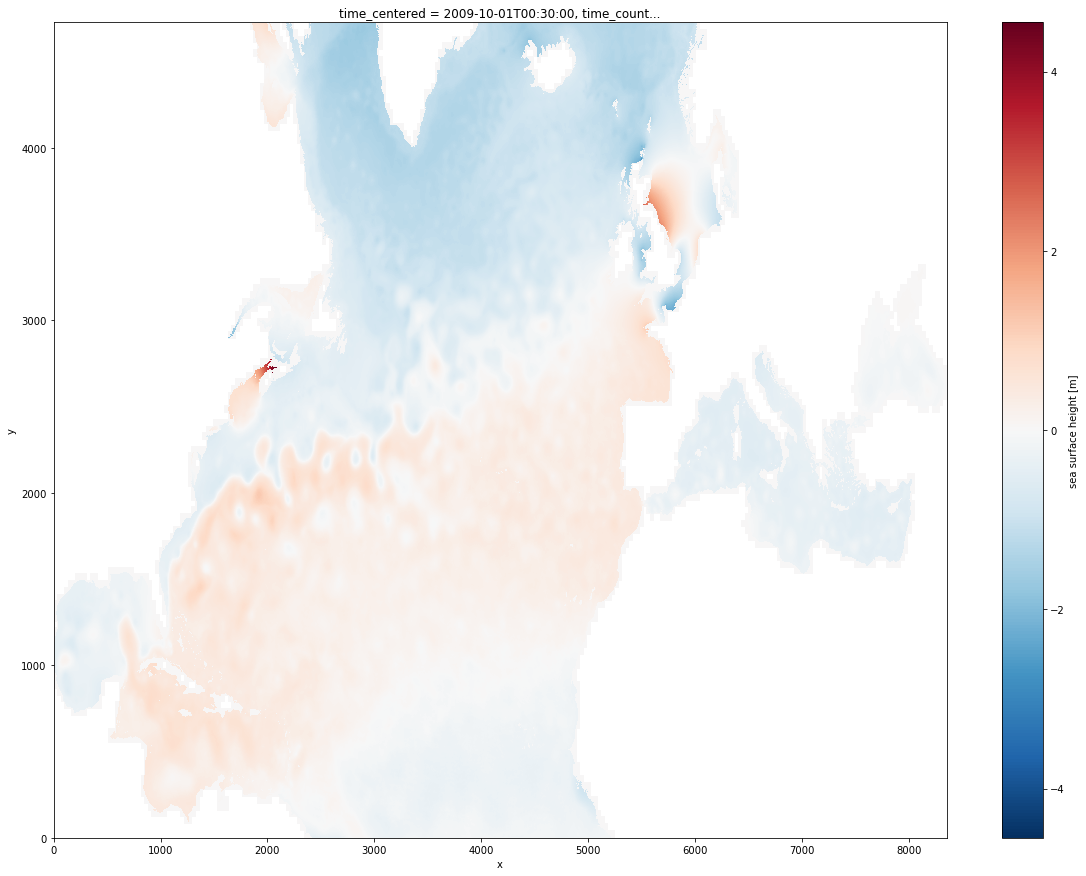

In [11]:
date='2009-10-01T00:30:00'
lat=ds.nav_lat.values
lon=ds.nav_lon.values


data=ds.sel(time_counter=date)['sossheig']
fig=plt.figure(figsize=(20,15))
data.plot()

In [12]:
def plot_surf(sub,data,lon,lat,vmin,vmax,cmap,title,date):
    
    ax = plt.subplot(sub,projection=ccrs.PlateCarree(central_longitude=0))
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.pcolormesh(lon,lat,data,cmap=cmap,vmin=vmin,vmax=vmax )
    plt.colorbar(orientation='horizontal',pad=0.1, aspect=50)
    plt.title(title)
    ax.text(0.57, -0.08, date, transform=ax.transAxes)


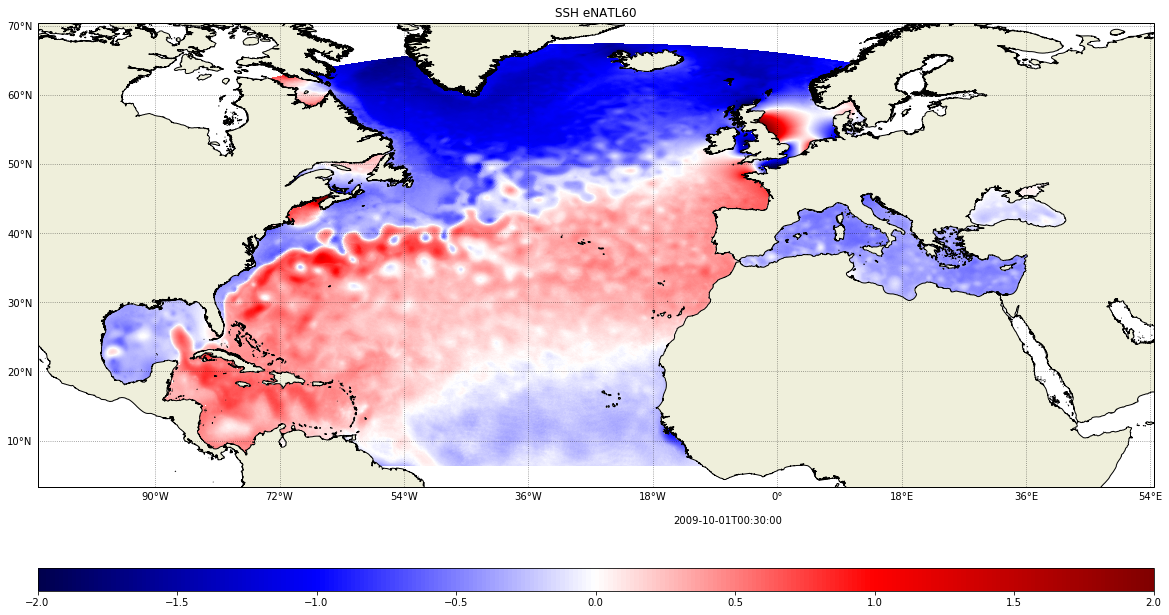

In [13]:
mapcoord = gcs.get_mapper('pangeo-data/eNATL60-I/zarr_coord_eNATL60')
dscoord=xr.open_zarr(mapcoord)

date='2009-10-01T00:30:00'
lat=dscoord.nav_lat.values
lon=dscoord.nav_lon.values


data=ds.sel(time_counter=date)['sossheig'].values

fig=plt.figure(figsize=(20,15))
plot_surf(111,data[0],lon,lat,-2,2,div_cmap,'SSH eNATL60',date)